# Los Angeles Restaurant Market Research
Market research for a restaurant in Los Angeles. I will find what types of restaurants are more and determine the difference between chain and non-chain restaurants. I will research on the number of seats and restaurant place.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Download-the-data-and-prepare-it-for-analysis" data-toc-modified-id="Step-1.-Download-the-data-and-prepare-it-for-analysis-1">Step 1. Download the data and prepare it for analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-1" data-toc-modified-id="Conclusion-step-1-1.1">Conclusion step 1</a></span></li></ul></li><li><span><a href="#Step-2.-Data-analysis" data-toc-modified-id="Step-2.-Data-analysis-2">Step 2. Data analysis</a></span><ul class="toc-item"><li><span><a href="#Investigation-of-the-proportions-of-the-various-types-of-establishments" data-toc-modified-id="Investigation-of-the-proportions-of-the-various-types-of-establishments-2.1">Investigation of the proportions of the various types of establishments</a></span></li><li><span><a href="#Investigation-of-the-proportions-of-chain-and-nonchain-establishments" data-toc-modified-id="Investigation-of-the-proportions-of-chain-and-nonchain-establishments-2.2">Investigation of the proportions of chain and nonchain establishments</a></span></li><li><span><a href="#Investigation-of-the-number-of-seats." data-toc-modified-id="Investigation-of-the-number-of-seats.-2.3">Investigation of the number of seats.</a></span></li><li><span><a href="#Investigation-by-street-names" data-toc-modified-id="Investigation-by-street-names-2.4">Investigation by street names</a></span></li></ul></li><li><span><a href="#Overall-conclusion" data-toc-modified-id="Overall-conclusion-3">Overall conclusion</a></span></li></ul></div>

## Step 1. Download the data and prepare it for analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white', palette='Set2')

In [2]:
data = pd.read_csv('rest_data_us.csv',
                  dtype={'object_type': 'category'})
data.info(memory_usage='deep')
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 1.8 MB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [3]:
data.chain.fillna(False, inplace=True)  # na to false
data['chain'] = data.chain.mask(cond=(
    (data.object_name.duplicated(keep=False)) & (data.chain == False)), other=True)  # duplicated name = chain

### Conclusion step 1
DB doesn't have a big problem. I change NA data in chain column to False. It's look like lost data. I change restaurants with the same names to a chain restaurant. After searching on Google, many restaurants with this name turn out to be chain restaurants.
## Step 2. Data analysis

### Investigation of the proportions of the various types of establishments

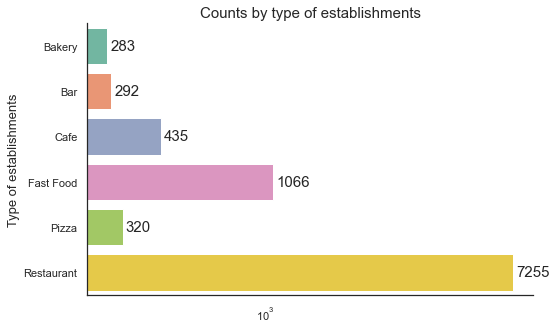

In [4]:
plt.figure(figsize=(8, 5))
splot = sns.countplot(data=data, y='object_type', log=True)
sns.despine()
plt.xlabel('')
plt.ylabel('Type of establishments', size=13)
plt.title('Counts by type of establishments', size=15)
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.0f'),
                   (p.get_width(), p.get_y()+p.get_height()/2),
                   ha="left", va="center",
                   size=15,
                   xytext=(3, 0),
                   textcoords='offset points')
#plt.savefig('Counts_by_type_of_establishments.png', transparent=True)

First type is "restautant". Second is "Fast Food". Bakeries have the least competition in the market since there are fewer of them.
### Investigation of the proportions of chain and nonchain establishments

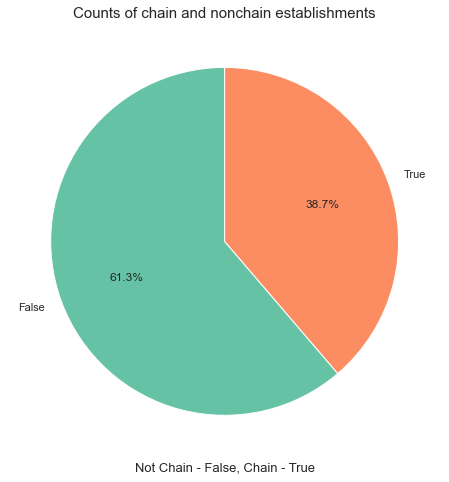

In [5]:
plt.figure(figsize=(8, 8))
data.groupby('chain')['id'].count().plot.pie(autopct='%1.1f%%', startangle=90)
plt.xlabel('Not Chain - False, Chain - True', size=13)
plt.ylabel('', size=13)
plt.title('Counts of chain and nonchain establishments', size=15);
#plt.savefig('Counts of chain and nonchain establishments.png', transparent=True)

There are almost twice as many non-chain restaurants as chain restaurants. This means that non-chain restaurants are well accepted by people.

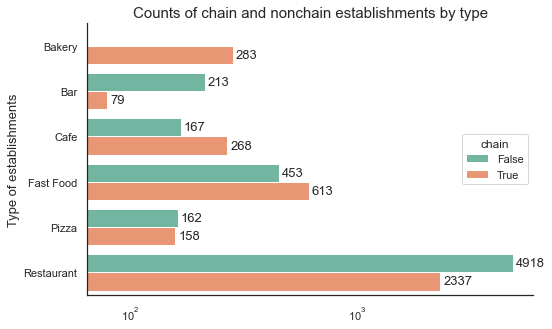

In [7]:
plt.figure(figsize=(8, 5))
splot = sns.countplot(data=data, y='object_type', log=True, hue='chain')
plt.xlabel('')
plt.ylabel('Type of establishments', size=13)
plt.title('Counts of chain and nonchain establishments by type', size=15)
sns.despine()
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.0f'),
                   (p.get_width(), p.get_y()+p.get_height()/2),
                   ha="left", va="center",
                   size=13,
                   xytext=(3, 0),
                   textcoords='offset points')
#plt.savefig('Counts of chain and nonchain establishments by type.png', transparent=True)

An interesting observation - bakeries are only chain. Most of all non-chain bars. Cafes and fast food are more networked, and pizzerias are about the same. The restaurants more are no-chain restaurants, but not significantly.

### Investigation of the number of seats.

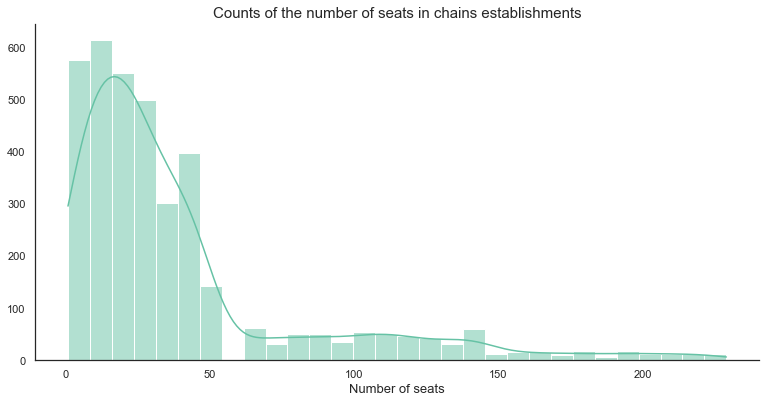

In [9]:
fig = data[['chain', 'number']]
fig = fig[fig.chain == True]
sns.displot(data=fig, x='number', bins=30, kde=True, height=5.5, aspect=2)
plt.xlabel('Number of seats', size=13)
plt.ylabel('', size=13)
plt.title('Counts of the number of seats in chains establishments', size=15);
#plt.savefig('Counts of chain and nonchain establishments by type_all.png', transparent=True)

Most of the restaurants have up to 50 seats.

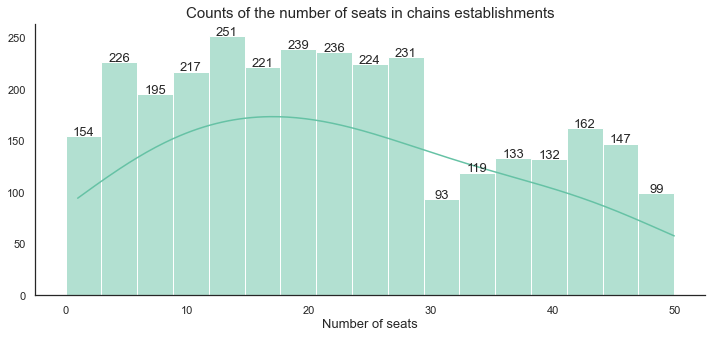

In [10]:
plt.figure(figsize=(12, 5))
hist = sns.histplot(data=fig,
                    x='number',
                    kde=True,
                    kde_kws={"clip": (0, 50)},
                    binrange=(0, 50))
plt.xlabel('Number of seats', size=13)
plt.ylabel('', size=13)
plt.title('Counts of the number of seats in chains establishments', size=15)
for p in hist.patches:
    hist.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha="center", va="center",
                  size=13,
                  xytext=(0, 4),
                  textcoords='offset points')
sns.despine()
#plt.savefig('Counts of chain and nonchain establishments by type_part.png', transparent=True)

Most establishments have from 5 to 30 seats.

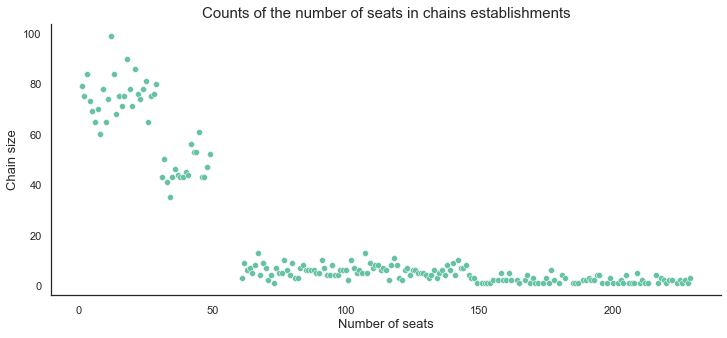

In [11]:
fig = data[data.chain == True].groupby(
    'number', as_index=False).agg({'object_name': 'count'})
plt.figure(figsize=(12, 5))
sns.scatterplot(x='number', y='object_name', data=fig)
sns.despine()
plt.xlabel('Number of seats', size=13)
plt.ylabel('Chain size', size=13)
plt.title('Counts of the number of seats in chains establishments', size=15);
#plt.savefig('Counts of chain and nonchain establishments by type_scatter.png', transparent=True)

And the less the number of establishments in the chain, the more seats.

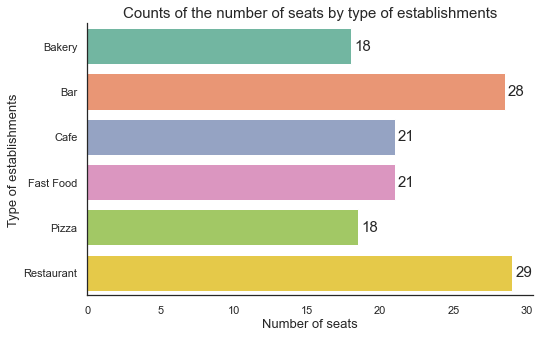

In [12]:
fig = data.groupby('object_type')['number'].median().reset_index()
plt.figure(figsize=(8, 5))
splot = sns.barplot(x='number', y='object_type', data=fig)
sns.despine()
plt.xlabel('Number of seats', size=13)
plt.ylabel('Type of establishments', size=13)
plt.title('Counts of the number of seats by type of establishments', size=15)
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.0f'),
                   (p.get_width(), p.get_y()+p.get_height()/2),
                   ha="left", va="center",
                   size=15,
                   xytext=(3, 0),
                   textcoords='offset points')
#plt.savefig('Counts of the number of seats by type of establishments.png', transparent=True)

Bars and restaurant have on average 29 seats. Other types have about 20.
### Investigation by street names

In [13]:
def only_string(address):
    """
    The function separates the street name from the full address of the establishment.
    """
    words = address.split()
    street = ''
    for word in words[:]:
        if word.isnumeric():
            words.remove(word)
        elif not len(word) > 1:
            words.remove(word)
        elif word in ['ST', 'AVE', 'BLVD', 'DR', 'WAY', 'GLEN', 'PARK']:
            street += word
            break
        else:
            street += word + ' '
    return street

In [14]:
data['street'] = data.address.apply(only_string)

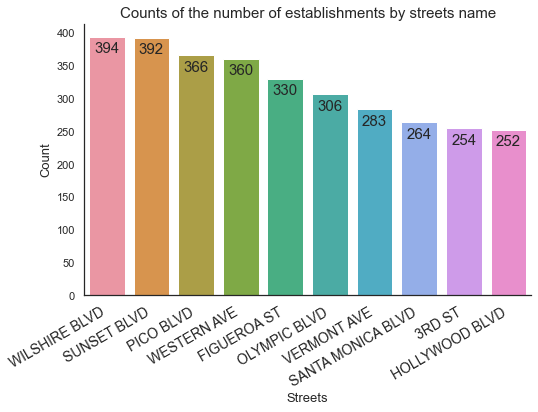

In [16]:
fig = data.groupby('street',
                   sort=False,
                   as_index=False)['address'].count().sort_values('address',
                                                                  ascending=False)
fig.columns = ['street', 'count']
plt.figure(figsize=(8, 5))
bar = sns.barplot(x='street', y='count', data=fig.head(10))
bar.set_xticklabels(labels=fig.street.head(
    10), fontsize=14, rotation=30, ha='right')
sns.despine()
plt.xlabel('Streets', size=13)
plt.ylabel('Count', size=13)
plt.title('Counts of the number of establishments by streets name', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=15,
                 xytext=(0, -12),
                 textcoords='offset points')
#plt.savefig('Counts of the number of establishments by streets name.png', 
#            transparent=True, 
#            bbox_inches = 'tight')

In [17]:
print(f"{fig.query('count < 2')['count'].count()} streets in LA only have one restaurant") 

328 streets in LA only have one restaurant


Wilshire Boulevard is a 25.48 km boulevard. One of the principal east-west arterial roads of Los Angeles.<br> Sunset Boulevard, which is about 36 kilometers long, is one of the main streets of Los Angeles.

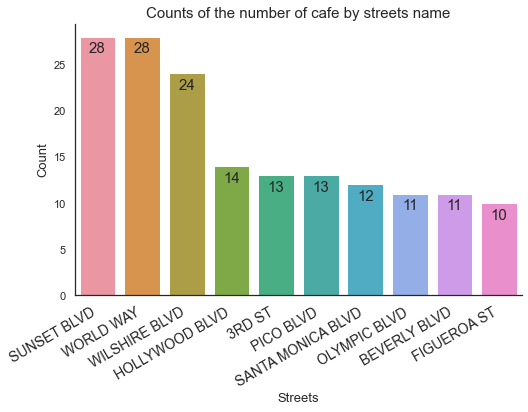

In [18]:
fig = data[data.object_type == 'Cafe'].groupby('street',
                   sort=False,
                   as_index=False)['address'].count().sort_values('address',
                                                                  ascending=False)
fig.columns = ['street', 'count']
plt.figure(figsize=(8, 5))
bar = sns.barplot(x='street', y='count', data=fig.head(10))
bar.set_xticklabels(labels=fig.street.head(
    10), fontsize=14, rotation=30, ha='right')
sns.despine()
plt.xlabel('Streets', size=13)
plt.ylabel('Count', size=13)
plt.title('Counts of the number of cafe by streets name', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=15,
                 xytext=(0, -12),
                 textcoords='offset points')
plt.savefig('Counts of the number of cafe by streets name.png', transparent=True, bbox_inches = 'tight')

Sunset boulevard, World way (airport) and Wilshire boulevard streets with many cafes.

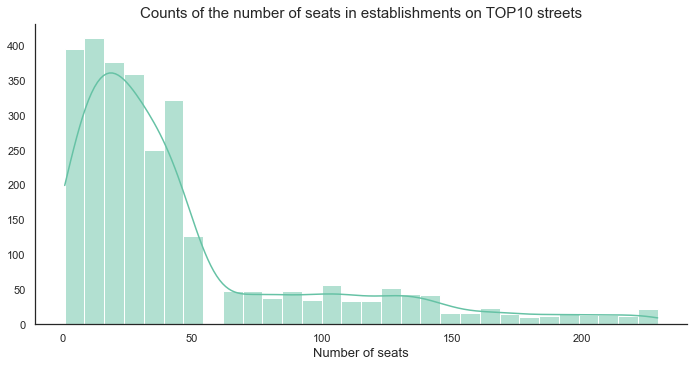

In [19]:
fig = data.query('street in @fig.street.head(10).tolist()')
sns.displot(data=fig, x='number', bins=30, kde=True, height=5, aspect=2)
plt.xlabel('Number of seats', size=13)
plt.ylabel('', size=13)
plt.title('Counts of the number of seats in establishments on TOP10 streets', size=15);
plt.savefig('Counts of the number of seats in establishments on TOP10 streets all.png', transparent=True)

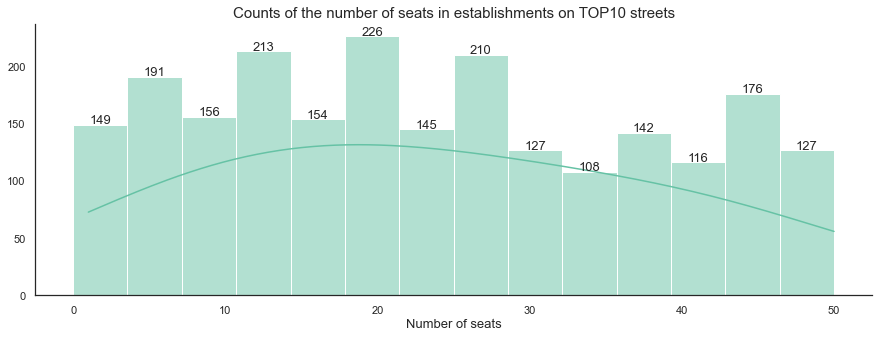

In [20]:
plt.figure(figsize=(15, 5))
bar = sns.histplot(data=fig, x='number', kde=True, kde_kws={"clip":(0,50)}, binrange=(0, 50))
plt.xlabel('Number of seats', size=13)
plt.ylabel('', size=13)
plt.title('Counts of the number of seats in establishments on TOP10 streets', size=15)
sns.despine()
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 4),
                 textcoords='offset points')
plt.savefig('Counts of the number of seats in establishments on TOP10 streets part.png', transparent=True)

Most of the restaurants have about 10, 20 or 40 seats.

## Overall conclusion
The competitive environment for cafes is easier than for restaurants, as there are 435 cafes in LA and 7255 restaurants. There are more chain cafes in the city and non-chain cafes with robot waiters can cause increased interest. We will open a cafe either on Hollywood Boulevard or on Pico Boulevard. The streets are in the top 10 in terms of the number of establishments, and therefore the number of people, but there are only 14 cafes. Also, the cafe will have no more than 20 seats.

Download [presentation](https://yadi.sk/i/ccIg1fwQfcuWow)